### 예제
1. test_csv 폴더에서 '오프라인.csv' 파일 로드
2. 컬럼의 이름 변경 -> ['기준년월','업종','성별','연령대','총이용건수','총이용금액']
3. 결측치가 존재하는가? 확인
4. 기준년월 데이터를 시계열 데이터로 to_datetime
5. 성별 기준 연도별 건당 이용금액 평균이 어케 되나?
    - 기준년 데이터가 존재하지 않음 -> 기준년 컬럼 생성 -> 기준년월 컬럼에서 추출
    - 건당 이용금액 데이터는 총이용금액 / 총이용금액
    - 기준년 데이터를 이용해 데이터 그룹화 / 재구조화 -> 건당 이용금액의 현금 

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#데이터 로드
offline = pd.read_csv("../test_csv/오프라인.csv",encoding='cp949')

In [3]:
offline.head(3)

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09


In [4]:
#데이터의 컬럼 변경
offline.columns = ['기준년월','업종','성별','연령대','총이용건수','총이용금액']
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.0


In [5]:
offline.rename(
    columns = {
        '기준년월' : '기준년월'
    }
)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [6]:
#결측치 확인
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2648 non-null   int64  
 1   업종      2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   총이용건수   2648 non-null   int64  
 5   총이용금액   2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [7]:
offline.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [8]:
# 성별 컬럼 데이터 중 '-'는 결측치라고 항목 정의서에 명시됨
# - 데이터의 개수 확인
# 1:남자, 2:여자, 9:남녀무관, -:결측치
offline['성별'].isin(['-']).sum()

np.int64(0)

In [9]:
offline['성별'].value_counts()

성별
2    1336
1    1312
Name: count, dtype: int64

In [10]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [11]:
# python에서 제공하는 map -> 함수, 1차원 데이터 -> map 타입으로 생성
# series에서 제공하는 map -> 함수만 써주면 됨 -> series 타입으로 생성
offline['기준년월'].map(
    lambda x : datetime.strptime(str(x),'%Y%m')
)

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [12]:
offline['기준년월'] = pd.to_datetime(offline['기준년월'],format='%Y%m')
offline['기준년월'] 

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [13]:
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.0


In [14]:
#년도만 추출
offline['기준년'] = offline['기준년월'].dt.strftime('%Y')

In [15]:
offline['기준년월'].map(
    lambda x : x.strftime('%Y')
)

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: object

In [16]:
# 건당 이용금액, 총 이용건수, 총 이용금액
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']
offline.head(3)

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년,건당이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019,7600.000000
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019,51342.269129
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019,105100.635357


In [17]:
# 연도별 건당이용금액을 확인
# 성별과 년도별 data를 이용하여 그룹화를 하고, 건당 이용급액의 평균을 구함
group_data = offline[['성별','기준년','건당이용금액']].groupby(['성별','기준년']).mean()

In [18]:
# unstack() -> 인덱스의 기준을 컬럼의 기준으로 변경
# stack() -> 컬럼의 기준을 인덱스의 기준으로 변경
group_data.unstack()

건당이용금액                            
기준년          2019          2020          2021
성별                                           
1    39184.349662  44009.589591  46948.320084
2    38107.838544  41389.763130  43306.318972

In [19]:
# 총 이용 금액은?
# pivot_table 이용 -> 성별 년도별로 총 이용 금액의 합계 확인하기
offline.pivot_table(
    index=['성별','기준년'],
    values = '총이용금액',
    aggfunc= 'sum'
)

총이용금액
성별 기준년               
1  2019  3.542740e+12
   2020  3.476297e+12
   2021  2.643688e+12
2  2019  7.210066e+12
   2020  6.485446e+12
   2021  4.840621e+12

- 위 데이터의 결과
    - 건당 이용 금액의 경우 남자의 금액이 여자의 금액보다 컸다.
    - 총 이용 금액의 경우 남자의 금액이 여자의 금액보다 작았다.
- 왜?
    - 큰 금액이 들어가는 물건은 남자의 카드로 결제했을 가능성이 있다.
    - 예시로 장보기와 같은 행동은 여자의 카드로 진행했을 가능성이 있다.

In [20]:
# import warnings
# warnings.filterwarnings()

In [21]:
import matplotlib.pyplot as plt
import platform

In [22]:
# 그래프 시각화를 위한 폰트 변경
if platform.system() == 'Darwin':
    plt.rc('font',famliy='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font',family="Malgun Gothic")

Text(0, 0.5, '총 이용금액')

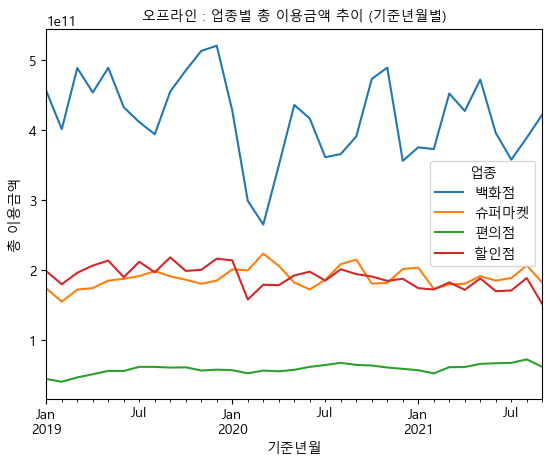

In [23]:
# 기준년월, 업종 별 총 이용금액 합계 -> 그래프 시각화(라인그래프)
group_data2 = offline.groupby(['기준년월','업종'])['총이용금액'].sum()
group_data2.unstack().plot()

plt.title("오프라인 : 업종별 총 이용금액 추이 (기준년월별)", fontsize=10)  # 제목 추가
plt.xlabel("기준년월")  # x축 라벨
plt.ylabel("총 이용금액")  # y축 라벨

1. 온라인.csv 파일 로드
2. 두 개의 데이터 프레임 단순 행 결합 ( 유니언 )
    - 오프라인 데이터와 온라인 데이터의 컬럼의 이름이 다름
        - 온라인 데이터의 컬럼의 이름을 변경
    - 오프라인 데이터에서 기준년월 컬럼은 시계열, 온라인은 숫자
        - 온라인 기준년월을 시계열로 변경
    - 오프라인 데이터에서 기준년, 건당이용금액 제거 (drop)
    - 온라인 데이터에 결측치가 존재하는가?
    - 단순 행 결합
3. 온라인 데이터에는 업종 컬럼이 존재하지 않기 때문에 결측치 생성
    - 결측치는 'online'으로 대체

In [24]:
# 데이터 로드
online = pd.read_csv('../test_csv/온라인.csv',encoding='cp949')

In [25]:
# 온라인 데이터의 컬럼 이름 변경경
online.columns = ['기준년월','성별','연령대','총이용건수','총이용금액']

In [26]:
# online 기준년월을 데이터타임으로 변경
online['기준년월'] = pd.to_datetime(online['기준년월'],format='%Y%m')

In [27]:
# online 컬럼 종류에서 파생 변수 삭제 (필터)
offline.drop(labels=['기준년','건당이용금액'], axis=1, inplace=True)

In [28]:
# 특정 컬럼만 선택 (필터)
offline.loc[:,'기준년월':'총이용금액']

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03
1,2019-01-01,백화점,1,10,379,1.945872e+07
2,2019-01-01,백화점,1,20,45173,4.747711e+09
3,2019-01-01,백화점,1,30,271858,2.791826e+10
4,2019-01-01,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,2021-09-01,편의점,2,50,844081,6.283353e+09
2644,2021-09-01,편의점,2,60,243768,1.997442e+09
2645,2021-09-01,편의점,2,70,40523,3.524203e+08
2646,2021-09-01,편의점,2,80,6349,5.333488e+07


In [29]:
# online데이터에 결측치 확인
online.isin(['-']).sum() # 성별 결측치 확인 왜? -> 성별 결측치는 '-'로 표시하고 있다고 했으므로.

기준년월     0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [30]:
# online, offline 유니언 결합
df = pd.concat([online,offline],axis=0)

In [31]:
df.head()

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,2019-01-01,1,1,1,1.106850e+05,NaN
1,2019-01-01,1,10,2333,9.810822e+07,NaN
2,2019-01-01,1,20,272915,1.385408e+10,NaN
3,2019-01-01,1,30,1320227,8.294613e+10,NaN
4,2019-01-01,1,40,1372052,9.555085e+10,NaN


In [32]:
# online데이터에 결측치 확인
df['업종'].isna().sum()

np.int64(651)

In [33]:
# 업종 결측치에 online 대체

# CASE 1:
# df['업종'].fillna('온라인')

# CASE 2:
df['업종'] = df['업종'].map(lambda x: '온라인' if pd.isna(x) else x)

# CASE 3:
# flag = df['업종'].isna()
# df.loc[flag,'업종'] ='온라인'

In [34]:
df['연령대'].value_counts()

연령대
10    330
20    330
30    330
70    330
40    330
50    330
60    330
90    330
80    330
0     284
1      45
Name: count, dtype: int64

In [35]:
# 연령대가 0인 데이터 284개
# 뭘까 무슨 의미일까 ????
# 우선은 해당 데이터를 제외하고 진행.
df.loc[df['연령대']==0]

,기준년월,성별,연령대,총이용건수,총이용금액,업종
10,2019-01-01,2,0,1,1000.0,온라인
38,2019-03-01,1,0,1,500.0,온라인
48,2019-03-01,2,0,2,202300.0,온라인
141,2019-08-01,2,0,5,189230.0,온라인
161,2019-09-01,2,0,4,125110.0,온라인
...,...,...,...,...,...,...
2598,2021-09-01,2,0,6,160420.0,할인점
2608,2021-09-01,1,0,27,1481300.0,슈퍼마켓
2618,2021-09-01,2,0,63,851350.0,슈퍼마켓
2628,2021-09-01,1,0,31,210240.0,편의점


In [36]:
# 연령대가 0이 아닌 데이터
df2 = df.loc[df['연령대']!=0]

In [37]:
# 업종 별 총이용금액 합계
group_data3 = df2.groupby(['기준년월','업종'])['총이용금액'].sum()

Text(0, 0.5, '총 이용금액')

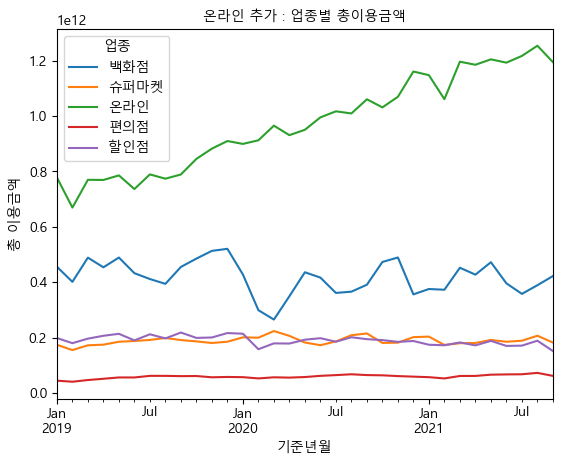

In [38]:
group_data3.unstack().plot()
plt.title('온라인 추가 : 업종별 총이용금액',fontsize=10)  # 제목 추가
plt.xlabel("기준년월")  # x축 라벨
plt.ylabel("총 이용금액")  # y축 라벨)

In [39]:
# 온라인과 오프라인의 그래프만 그리기

# 새로운 파생변수 생성 ( 온라인이면 0, 오프라인이면 1)
flag = df2['업종']=='온라인'
df2.loc[flag, '온/오프'] = 0
df2.loc[~flag, '온/오프'] = 1

C:\Users\Owner\AppData\Local\Temp\ipykernel_34496\3601826857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[flag, '온/오프'] = 0


In [40]:
df2['온/오프'].value_counts()

온/오프
1.0    2415
0.0     600
Name: count, dtype: int64

In [41]:
df2['온/오프'] = df2['온/오프'].map(
    {
        0: '온라인',
        1: '오프라인'
    }
)

C:\Users\Owner\AppData\Local\Temp\ipykernel_34496\102971708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['온/오프'] = df2['온/오프'].map(


Text(0.5, 1.0, '온라인, 오프라인 총 이용금액')

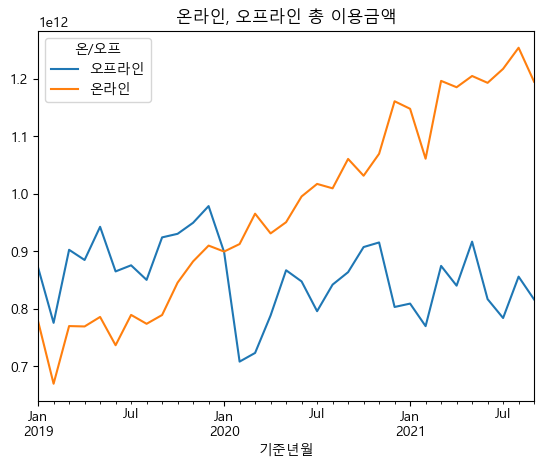

In [42]:
df2.pivot_table(
    index = '기준년월',
    columns = '온/오프',
    values = '총이용금액',
    aggfunc = 'sum'
).plot()
plt.title('온라인, 오프라인 총 이용금액')

In [43]:
group_data3

기준년월        업종  
2019-01-01  백화점     4.558954e+11
            슈퍼마켓    1.736124e+11
            온라인     7.782817e+11
            편의점     4.408355e+10
            할인점     1.981718e+11
                        ...     
2021-09-01  백화점     4.220791e+11
            슈퍼마켓    1.818071e+11
            온라인     1.195268e+12
            편의점     6.136224e+10
            할인점     1.510787e+11
Name: 총이용금액, Length: 165, dtype: float64

<Axes: xlabel='기준년월'>

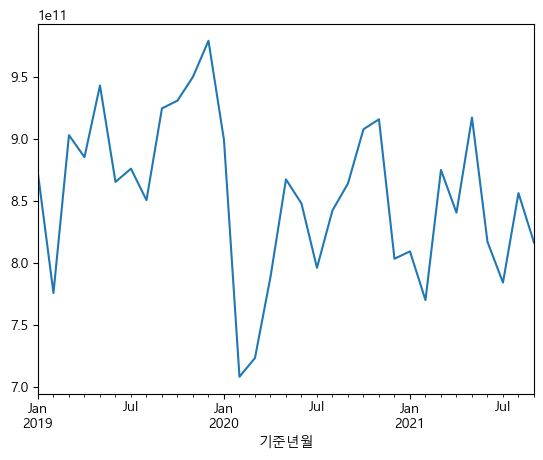

In [44]:
group_data3.unstack().drop('온라인',axis=1).sum(axis=1).plot()